データの読み込み

In [201]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import collections
from collections import Counter
import seaborn as sns 
from IPython.core.display import display
from sklearn import tree
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [202]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


https://www.kaggle.com/c/titanic/data データの中身<br>
- PassengerId: 乗客ID<br>
- Survived: 生存しているか否か<br>
YES=1, NO=0
- Pclass:  Ticket Class<br>
1st=1, 2nd=2, 3rd=3
- Name: 名前<br>
- Sex: 性別<br>
- Age: 年齢<br>
- Sibsp: 乗船している夫婦、兄弟姉妹の数<br>
- Parch: 乗船している親、子供の数<br>
- Fare: 料金<br>
- Cabin: 船室<br>
- Embarked: 乗船場<br>
Cherbourg=C, Queenstown=Q, Southampton=S

In [203]:
display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**データの型**

In [204]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

**欠損値の確認**

In [205]:
display(df_train.isnull().sum())
display(df_test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

主にAgeとCabinに欠損値がある.<br>
- trainデータ <br>
    - Age = 約20%の欠損 <br>
    - Cabin = 約77%の欠損 <br>
- testデータ <br>
    - Age = 約21%の欠損 <br>
    - Cabin = 約78%の欠損 <br>
<br>
→  Cabinを用いるのは厳しい？

**基本統計量の確認**

In [206]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


実際の乗客は2,224人→データ(40%) <br>
実際の生存率は32%→データ（38%）<br>
75%以上の人がparentsやchildrenと旅行していない <br>
→30%ぐらいは親や配偶者と<br>
1%以下の客が512以上 <br>
65-80歳の客が1%以下 <br>

In [207]:
df_train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Anderson, Mr. Harry",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


名前が同じ人はいない <br>
65%以上が男 <br>
乗船場所はSが一番多い(73%) <br>
値段の重複したチケットが(22%) <br>

In [208]:
Count_Survived = Counter(df_train["Survived"])
Count_Sex = Counter(df_train["Sex"])
Count_Survived = Counter(df_train["Pclass"])
Count_Embarked = Counter(df_train["Embarked"])

In [209]:
#sns.pairplot(df_train, hue="Survived")

In [210]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**ダミー変数の導入**

In [211]:
sex_dum = pd.get_dummies(df_train['Sex'])
df_train_proc = pd.concat((df_train,sex_dum),axis=1)
#concat=結合
df_train_proc = df_train_proc.drop('Sex',axis=1)
df_train_proc = df_train_proc.drop('female',axis=1)
#male=1, female=0　のダミー変数を導入
df_train["Embarked"]=df_train["Embarked"].fillna("S")
emb_dum = pd.get_dummies(df_train["Embarked"])
df_train_proc = pd.concat((df_train_proc,emb_dum),axis=1)
df_train_proc = df_train_proc.drop("Embarked", axis=1)
df_train_proc = df_train_proc.drop("S", axis=1)

df_train_proc.rename(columns={"male":"Sex"}, inplace=True)
#名前の変更


In [212]:
df_train_proc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0


In [213]:
df_train_proc_dn = df_train_proc.dropna()
df_train_proc_dn = df_train_proc_dn.drop("PassengerId", axis=1)
df_train_proc_dn = df_train_proc_dn.drop("Name", axis=1)
df_train_proc_dn = df_train_proc_dn.drop("Ticket", axis=1)
df_train_proc_dn = df_train_proc_dn.drop("Cabin", axis=1)

df_train_proc_dn.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,C,Q
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,-0.535727,0.098712,-0.039232
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,-0.041725,-0.228001,-0.038676
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,0.172307,0.076824,0.017855
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,-0.095344,-0.050628,0.169778
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,-0.081832,-0.068949,-0.065543
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,-0.129871,0.239531,0.015604
Sex,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,1.000000,-0.053879,-0.002826
C,0.098712,-0.228001,0.076824,-0.050628,-0.068949,0.239531,-0.053879,1.000000,-0.076941
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,-0.002826,-0.076941,1.000000


SexとAgeはSurvivedとの相関が高いので, SexとAgeとSurvivedの関係を見る.
（ただし, Ageには20%の欠損が存在するため後に補完する必要がある）

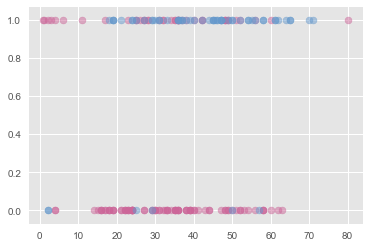

In [214]:
plt.style.use('ggplot')
 
df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==1]
df_train_sur_age = df_train_sur.iloc[:,2]
#iloc=  列の指定
df_train_sur_s = df_train_sur.iloc[:,6]
plt.scatter(df_train_sur_age,df_train_sur_s,color="#cc6699",alpha=0.5)
#x軸=df_train_sur_age, y軸=df_train_sur_s
df_train_sur = df_train_proc_dn[df_train_proc_dn.Survived==0]
df_train_sur_age = df_train_sur.iloc[:,2]
df_train_sur_s = df_train_sur.iloc[:,6]
plt.scatter(df_train_sur_age,df_train_sur_s,color="#6699cc",alpha=0.5)
 
plt.show()

- 女性の方が生存率が高い. <br>
- 大人の死亡率が高い. 特に男性 <br>
- 高齢者, 子供, 女性が優先的に救出されたと考えられる.

**名前の分割**

敬称

In [215]:
name = df_train["Name"].str.split("[,]").str.get(1)
name = name.str.split("[.]").str.get(0)
name = name.str.split("[ ]").str.get(1)

df_train_mod = df_train_proc.drop('Name',axis=1)
df_train_mod = pd.concat((df_train_mod,name),axis=1)
#display(df_train_mod)


In [216]:
age_median = df_train_mod.groupby("Name").median()
age_median = age_median["Age"]

#temp_flag = df_train_mod["Age"].isnull() == True
#df_train_mod.ix[temp_flag, "Age"] = df_train_mod[temp_flag][]
display(age_median)
#display(df_train_mod.head())

Name
Capt        70.0
Col         58.0
Don         40.0
Dr          46.5
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       3.5
Miss        21.0
Mlle        24.0
Mme         24.0
Mr          30.0
Mrs         35.0
Ms          28.0
Rev         46.5
Sir         49.0
the         33.0
Name: Age, dtype: float64

In [217]:
#関数を作る
def fill_med_age(row):
    if np.isnan(row["Age"]):
        return age_median[row["Name"]]
    else:
        return row["Age"]

f = lambda row: age_median[row["Name"]] if np.isnan(row["Age"]) else row["Age"]
df_traintemp = df_train_mod.apply(f, axis = 1)

df_traintemp = df_traintemp.rename("fillnan_age")
df_train_mod = pd.concat((df_train_mod, df_traintemp), axis=1)
df_train_mod = df_train_mod.drop("Age", axis=1)
display(df_train_mod)

,PassengerId,Survived,Pclass,SibSp,Parch,Ticket,Fare,Cabin,Sex,C,Q,Name,fillnan_age
0,1,0,3,1,0,A/5 21171,7.2500,NaN,1,0,0,Mr,22.0
1,2,1,1,1,0,PC 17599,71.2833,C85,0,1,0,Mrs,38.0
2,3,1,3,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,Miss,26.0
3,4,1,1,1,0,113803,53.1000,C123,0,0,0,Mrs,35.0
4,5,0,3,0,0,373450,8.0500,NaN,1,0,0,Mr,35.0
5,6,0,3,0,0,330877,8.4583,NaN,1,0,1,Mr,30.0
6,7,0,1,0,0,17463,51.8625,E46,1,0,0,Mr,54.0
7,8,0,3,3,1,349909,21.0750,NaN,1,0,0,Master,2.0
8,9,1,3,0,2,347742,11.1333,NaN,0,0,0,Mrs,27.0
9,10,1,2,1,0,237736,30.0708,NaN,0,1,0,Mrs,14.0


敬称について

In [218]:
name_dum = pd.get_dummies(df_train_mod["Name"], drop_first=True)
#drop_first でn-1個になる
train_mod = pd.concat((df_train_mod,name_dum),axis=1)
#name_dum.head()

In [219]:
Count_Name = Counter(df_train_mod["Name"])
#display(Count_Name)
df_CN = pd.DataFrame.from_dict([Count_Name])
for column in df_CN.columns:
    if df_CN[column][0] < 50:
        df_CN = df_CN.drop(column, axis = 1)
        
#display(df_CN)

苗字

In [220]:
last_name = df_train["Name"].str.split("[,]").str.get(0)
last_name = last_name.rename("Last_name")

**Ticketの分割（ミス）**

In [221]:
ticket_1 = df_train["Ticket"].str.split().str.get(0)
ticket_1 = ticket_1.rename("Ticket"+"_flag")

ticket_2 = df_train["Ticket"].str.split().str.get(1)
#ticket_2 = ticket_2.fillna(0)
ticket_2 = ticket_2.rename("Ticket"+"_No")

ticket_TF = ticket_1.str.isnumeric()
ticket_TF = ticket_TF.rename("Ticket")

ticket_TF = pd.concat((ticket_TF, ticket_1), axis=1)
df_ticket = pd.concat((ticket_TF, ticket_2), axis=1)

#bool型からobject型に変更する
#ticket_TF = ticke.astype("object")
#display(ticket_TF.head())
#display(type(ticket_TF[0]))
#enumerateでインデックス付きループが回せる

count = 0
display(df_ticket.head(180))
"""
for index, ticket_one_data in df_ticket.iterrows():
    #if count < 5:
        #print(ticket_one_data)
    if ticket_one_data["Ticket_No"] == 0:
        df_ticket.ix[index, "Ticket_No"] = ticket_one_data["Ticket_flag"]
"""
#forを使わない一般的な書き方（推奨）
temp_flag = df_ticket["Ticket_No"].isnull()
#display(temp_flag)
#display(df_ticket[temp_flag].head(10))
df_ticket.ix[temp_flag, "Ticket_No"] = df_ticket[temp_flag]["Ticket_flag"]

temp_flag = df_ticket["Ticket"] == True
df_ticket.ix[temp_flag, "Ticket_flag"] = df_ticket[temp_flag]["Ticket"]
df_ticket["Ticket_flag"] = df_ticket["Ticket_flag"].replace(True, "NA")
df_ticket = df_ticket.drop("Ticket", axis=1)
#display(df_ticket.head())


,Ticket,Ticket_flag,Ticket_No
0,False,A/5,21171
1,False,PC,17599
2,False,STON/O2.,3101282
3,True,113803,NaN
4,True,373450,NaN
5,True,330877,NaN
6,True,17463,NaN
7,True,349909,NaN
8,True,347742,NaN
9,True,237736,NaN


**CabinのNAの対処**

In [222]:
cabin = df_train["Cabin"]
cabin = cabin.fillna("Cabin_NA")

In [223]:
#df_train_mod = pd.concat((df_train_mod, df_ticket), axis=1)
df_train_mod = pd.concat((df_train_mod, last_name), axis=1)
df_train_mod = df_train_mod.drop("Cabin", axis=1)
df_train_mod = pd.concat((df_train_mod, cabin), axis=1)
df_train_mod = df_train_mod.drop("Ticket", axis=1)

In [224]:
df_train_mod.index

RangeIndex(start=0, stop=891, step=1)

In [225]:
#Pclassのdummy
class_dum = pd.get_dummies(df_train_mod["Pclass"], drop_first=True)
df_train_mod = pd.concat((df_train_mod, class_dum), axis=1)
df_train_mod = df_train_mod.drop("Pclass", axis=1)
df_train_mod = pd.concat((df_train_mod, name_dum), axis=1)
df_train_mod = df_train_mod.drop("Name", axis=1)
#Ticket_flagのdummy
#Tf_dm = pd.get_dummies(df_train_mod["Ticket_flag"], drop_first=True)
#df_train_mod = pd.concat((df_train_mod, Tf_dm), axis=1)
#df_train_mod = df_train_mod.drop("Ticket_flag", axis=1)
#Last_nameのdummy
Ln_dm = pd.get_dummies(df_train_mod["Last_name"], drop_first=True)
df_train_mod = pd.concat((df_train_mod, Ln_dm), axis=1)
df_train_mod = df_train_mod.drop("Last_name", axis=1)
#Cabinのdummy
Cb_dm = pd.get_dummies(df_train_mod["Cabin"], drop_first=True)
df_train_mod = pd.concat((df_train_mod, Cb_dm), axis=1)
df_train_mod = df_train_mod.drop("Cabin", axis=1)

train_last = df_train_mod.drop("PassengerId", axis=1)
display(train_last.head(10))


,Survived,SibSp,Parch,Fare,Sex,C,Q,fillnan_age,2,3,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,1,0,7.2500,1,0,0,22.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,71.2833,0,1,0,38.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,7.9250,0,0,0,26.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,53.1000,0,0,0,35.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,8.0500,1,0,0,35.0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.4583,1,0,1,30.0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,51.8625,1,0,0,54.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,1,21.0750,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,2,11.1333,0,0,0,27.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,30.0708,0,1,0,14.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
train_last.info()
train_last.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 839 entries, Survived to T
dtypes: float64(2), int64(3), uint8(834)
memory usage: 760.6 KB


Survived         int64
SibSp            int64
Parch            int64
Fare           float64
Sex              uint8
C                uint8
Q                uint8
fillnan_age    float64
2                uint8
3                uint8
Col              uint8
Don              uint8
Dr               uint8
Jonkheer         uint8
Lady             uint8
Major            uint8
Master           uint8
Miss             uint8
Mlle             uint8
Mme              uint8
Mr               uint8
Mrs              uint8
Ms               uint8
Rev              uint8
Sir              uint8
the              uint8
Abbott           uint8
Abelson          uint8
Adahl            uint8
Adams            uint8
                ...   
E12              uint8
E121             uint8
E17              uint8
E24              uint8
E25              uint8
E31              uint8
E33              uint8
E34              uint8
E36              uint8
E38              uint8
E40              uint8
E44              uint8
E46        

**Ticketの分割**

In [227]:
df_ticket=df_train["Ticket"]
ticket_sp=df_ticket.str.rsplit().str.get(-1)
ticket_sp=ticket_sp.rename("Ticket"+"_number")
ticket_Nbflag=ticket_sp.str.isdigit()
ticket_Nbflag=ticket_Nbflag.rename("Ticket"+"_Nbflag")
ticket_number=pd.concat((ticket_sp, ticket_Nbflag), axis=1)

#ループ（数字のみ完成）
temp_flag = ticket_number["Ticket_Nbflag"] 
ticket_number.ix[temp_flag, "Ticket_Nbflag"] = ticket_number[temp_flag]["Ticket_number"]
ticket_number["Ticket_Nbflag"]= ticket_number["Ticket_Nbflag"].replace(False, "NA")

#文字
ticket_fill=df_ticket.str.split()
#ticket_fill=df_ticket.str.replace(" ", "")
#display(b.head(180))
#ticket_digit=df_train["Ticket"].str.isdigit()
#ticket_digit=ticket_digit.rename("Ticket"+"_digit")
#df_ticket=pd.concat((df_ticket, ticket_digit), axis=1)

#temp_flag = df_ticket["Ticket_digit"] == True
#df_ticket.ix[temp_flag, "Ticket_digit"] = df_ticket[temp_flag]["Ticket"]
#df_ticket["Ticket_digit"] = df_ticket["Ticket_digit"].replace(False, "NA")
#df_ticket = df_ticket.drop("Ticket", axis=1)
#数字+文字の数字
#ticket_mix_digit=df_ticket["Ticket"].str.rsplit().str.get(-1)
#ticket_mix_digit_TF=ticket_mix_digit.str.isdigit()
#ticket_mix_digit_TF=ticket_mix_digit_TF.rename("Ticket"+"_mix_digit_TF")
#ticket_mix_digit=pd.concat((ticket_mix_digit, ticket_mix_digit_TF), axis=1)
#temp_flag = ticket_mix_digit["Ticket_mix_digit_TF"] == True
#ticket_mix_digit.ix[temp_flag, "Ticket_mix_digit_TF"] = ticket_mix_digit[temp_flag]["Ticket"]
#ticket_mix_digit=ticket_mix_digit.fillna(0)
#a=pd.concat((ticket_mix_digit, df_ticket), axis=1)

ticket_fill = ["".join(str_list[:-1]) for str_list in ticket_fill]

ticket_num=pd.DataFrame(ticket_fill)
ticket_num.columns=["Ticket_ID"]

ticket_num.columns=ticket_num.columns

a=pd.Series(ticket_num.values.flatten()).str.replace(".","")
b=pd.Series(ticket_num.values.flatten()).str.replace(".","").str.replace("/", "")
ticket=pd.concat((df_ticket, ticket_num, ticket_number["Ticket_Nbflag"]), axis=1)
ticket.columns=["Ticket", "Ticket_ID", "Ticket_NUM"]
#a=ticket["Ticket_ID"]
display(Counter(ticket["Ticket_ID"]))
#display(ticket_fill)
display(Counter(a))
display(Counter(b))

Counter({'': 665,
         'A./5.': 2,
         'A.5.': 2,
         'A/4': 3,
         'A/4.': 3,
         'A/5': 10,
         'A/5.': 7,
         'A/S': 1,
         'A4.': 1,
         'C': 5,
         'C.A.': 27,
         'C.A./SOTON': 1,
         'CA': 6,
         'CA.': 8,
         'F.C.': 1,
         'F.C.C.': 5,
         'Fa': 1,
         'P/PP': 2,
         'PC': 60,
         'PP': 3,
         'S.C./A.4.': 1,
         'S.C./PARIS': 2,
         'S.O./P.P.': 3,
         'S.O.C.': 5,
         'S.O.P.': 1,
         'S.P.': 1,
         'S.W./PP': 1,
         'SC': 1,
         'SC/AH': 2,
         'SC/AHBasle': 1,
         'SC/PARIS': 5,
         'SC/Paris': 4,
         'SCO/W': 1,
         'SO/C': 1,
         'SOTON/O.Q.': 8,
         'SOTON/O2': 2,
         'SOTON/OQ': 7,
         'STON/O2.': 18,
         'SW/PP': 1,
         'W./C.': 9,
         'W.E.P.': 1,
         'W/C': 1,
         'WE/P': 2})

Counter({'': 665,
         'A/4': 6,
         'A/5': 19,
         'A/S': 1,
         'A4': 1,
         'A5': 2,
         'C': 5,
         'CA': 41,
         'CA/SOTON': 1,
         'FC': 1,
         'FCC': 5,
         'Fa': 1,
         'P/PP': 2,
         'PC': 60,
         'PP': 3,
         'SC': 1,
         'SC/A4': 1,
         'SC/AH': 2,
         'SC/AHBasle': 1,
         'SC/PARIS': 7,
         'SC/Paris': 4,
         'SCO/W': 1,
         'SO/C': 1,
         'SO/PP': 3,
         'SOC': 5,
         'SOP': 1,
         'SOTON/O2': 2,
         'SOTON/OQ': 15,
         'SP': 1,
         'STON/O2': 18,
         'SW/PP': 2,
         'W/C': 10,
         'WE/P': 2,
         'WEP': 1})

Counter({'': 665,
         'A4': 7,
         'A5': 21,
         'AS': 1,
         'C': 5,
         'CA': 41,
         'CASOTON': 1,
         'FC': 1,
         'FCC': 5,
         'Fa': 1,
         'PC': 60,
         'PP': 3,
         'PPP': 2,
         'SC': 1,
         'SCA4': 1,
         'SCAH': 2,
         'SCAHBasle': 1,
         'SCOW': 1,
         'SCPARIS': 7,
         'SCParis': 4,
         'SOC': 6,
         'SOP': 1,
         'SOPP': 3,
         'SOTONO2': 2,
         'SOTONOQ': 15,
         'SP': 1,
         'STONO2': 18,
         'SWPP': 2,
         'WC': 10,
         'WEP': 3})

In [228]:
df_train_mod.columns

Index(['PassengerId',    'Survived',       'SibSp',       'Parch',
              'Fare',         'Sex',           'C',           'Q',
       'fillnan_age',             2,
       ...
                'E8',       'F E69',       'F G63',       'F G73',
                'F2',         'F33',         'F38',          'F4',
                'G6',           'T'],
      dtype='object', length=840)

**Decision Tree**

In [229]:
dict_vec = DictVectorizer()

X = dict_vec.fit_transform(
    train_last.iloc[:, 1:].to_dict("records")
    ).toarray()

TypeError: '<' not supported between instances of 'int' and 'str'

**Random Forest**

In [ ]:
X_train = train_last.iloc[:, 1:].values
Y_train = train_last["Survived"].values
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

In [ ]:
y_test_pred = forest.predict(X_test)

In [230]:
for row_i, row in enumerate(X_train):
    for col_i, i in enumerate(row):
        if type(i) is str or np.isnan(i):
            print(i, row_i, col_i)

**テストデータ**

In [231]:
display(train_last)
display(test_last)

,Survived,SibSp,Parch,Fare,Sex,C,Q,fillnan_age,2,3,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
0,0,1,0,7.2500,1,0,0,22.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,71.2833,0,1,0,38.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,7.9250,0,0,0,26.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,53.1000,0,0,0,35.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,8.0500,1,0,0,35.0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,8.4583,1,0,1,30.0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,51.8625,1,0,0,54.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,1,21.0750,1,0,0,2.0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,2,11.1333,0,0,0,27.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,0,30.0708,0,1,0,14.0,1,0,...,0,0,0,0,0,0,0,0,0,0


,SibSp,Parch,Fare,Sex,C,Q,fillnan_age,2,3,Dona,...,E52,E60,F,F E46,F E57,F G63,F2,F33,F4,G6
0,0,0,7.8292,1,0,1,34.5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,7.0000,0,0,0,47.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.6875,1,0,1,62.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,8.6625,1,0,0,27.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,12.2875,0,0,0,22.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,9.2250,1,0,0,14.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,7.6292,0,0,1,30.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,29.0000,1,0,0,26.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,7.2292,0,1,0,18.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,24.1500,1,0,0,21.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


 name_class = pd.DataFrame(columns={"Miss", "Mrs", "Master", "Mr", "Others"})

for Name in df_train_mod:        
        if 'Miss' in Name:
            df = pd.DataFrame([[1,0,0,0,0]],columns={'Miss','Mrs','Master',"Mr", 'Others', })
        elif 'Mrs' in Name:
            df = pd.DataFrame([[0,1,0,0,0]],columns={'Miss','Mrs','Master',"Mr", 'Others', })
        elif 'Master' in Name:
            df = pd.DataFrame([[0,0,1,0,0]],columns={'Miss','Mrs','Master',"Mr", 'Others', })
        elif 'Mr' in Name:
            df = pd.DataFrame([[0,0,0,1,0]],columns={'Miss','Mrs','Master',"Mr", 'Others', })
        else :
            df = pd.DataFrame([[0,0,0,0,1]],columns={'Miss','Mrs','Master',"Mr", 'Others', })
        name_class = name_class.append(df,ignore_index=True)  

In [232]:
name_df_train = df_train.iloc[:,3]
survive_array = df_train.iloc[:,1]
 
name_df = name_df_train
 
name_array = []
name_count = []
name_survive_count = []
name_survive_ratio = []
 
name_i = 0
 
for name in name_df:   
    name_split = name.split(" ")
    name_split_first = name_split[0].replace(',','')
    if name_split_first in name_array:
        name_count[name_array.index(name_split_first)] = name_count[name_array.index(name_split_first)] + 1
        name_survive_count[name_array.index(name_split_first)] = name_survive_count[name_array.index(name_split_first)] + survive_array[name_i]                            
    else:
        name_array.append(name_split_first)
        name_count.append(1)
        name_survive_count.append(survive_array[name_i])
    name_i = name_i + 1
        
count = 0
for i in name_count:
    if name_count[count] == 1:
        name_survive_ratio.append(0)
    else:
        name_survive_ratio.append(name_survive_count[count]/(name_count[count]))
    count = count + 1
    
survive_ratio_array = []    
 
for name in name_df:
    name_split = name.split(" ")
    name_split_first = name_split[0].replace(',','')
    survive_ratio_array.append(name_survive_ratio[name_array.index(name_split_first)])
 



In [233]:
    name_class = pd.DataFrame(columns={'miss','mrs','master','mr'})
    
    for Name in df_train_mod:        
        if 'Miss' in Name:
            df = pd.DataFrame([[1,0,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Mrs' in Name:
            df = pd.DataFrame([[0,1,0,0]],columns={'miss','mrs','master','mr'})
        elif 'Master' in Name:
            df = pd.DataFrame([[0,0,1,0]],columns={'miss','mrs','master','mr'})
        elif 'Mr' in Name:
            df = pd.DataFrame([[0,0,0,1]],columns={'miss','mrs','master','mr'})
        else :
            df = pd.DataFrame([[0,0,0,0]],columns={'miss','mrs','master','mr'})
        name_class = name_class.append(df,ignore_index=True)  
        #append = 追加

TypeError: argument of type 'int' is not iterable

In [236]:
sex_dum = pd.get_dummies(df_test['Sex'])
df_test_proc = pd.concat((df_test,sex_dum),axis=1)
#concat=結合
df_test_proc = df_test_proc.drop('Sex',axis=1)
df_test_proc = df_test_proc.drop('female',axis=1)
#male=1, female=0　のダミー変数を導入
emb_dum = pd.get_dummies(df_test["Embarked"])
df_test_proc = pd.concat((df_test_proc,emb_dum),axis=1)
df_test_proc = df_test_proc.drop("Embarked", axis=1)
df_test_proc = df_test_proc.drop("S", axis=1)

df_test_proc.rename(columns={"male":"Sex"}, inplace=True)
#名前の変更
df_test_proc_dn = df_test_proc.dropna()
df_test_proc_dn = df_test_proc_dn.drop("PassengerId", axis=1)
df_test_proc_dn = df_test_proc_dn.drop("Name", axis=1)
df_test_proc_dn = df_test_proc_dn.drop("Ticket", axis=1)
df_test_proc_dn = df_test_proc_dn.drop("Cabin", axis=1)

name = df_test["Name"].str.split("[,]").str.get(1)
name = name.str.split("[.]").str.get(0)
name = name.str.split("[ ]").str.get(1)

df_test_mod = df_test_proc.drop('Name',axis=1)
df_test_mod = pd.concat((df_test_mod,name),axis=1)

#display(df_test_mod)ここまではOK

name = df_test["Name"].str.split("[,]").str.get(1)
name = name.str.split("[.]").str.get(0)
name = name.str.split("[ ]").str.get(1)
age_median = df_test_mod.groupby("Name").median()
age_median = age_median.fillna(28)
age_median = age_median["Age"]

#関数を作る
def fill_med_age(row):
    if np.isnan(row["Age"]):
        return age_median[row["Name"]]
    else:
        return row["Age"]

f = lambda row: age_median[row["Name"]] if np.isnan(row["Age"]) else row["Age"]
df_testtemp = df_test_mod.apply(f, axis = 1)

df_testtemp = df_testtemp.rename("fillnan_age")
df_test_mod = pd.concat((df_test_mod, df_testtemp), axis=1)
df_test_mod = df_test_mod.drop("Age", axis=1)
#display(df_train_mod)



name_dum = pd.get_dummies(df_test_mod["Name"], drop_first=True)
#drop_first でn-1個になる
test_mod = pd.concat((df_test_mod,name_dum),axis=1)
#name_dum.head()
Count_Name = Counter(df_test_mod["Name"])
#display(Count_Name)
df_CN = pd.DataFrame.from_dict([Count_Name])
for column in df_CN.columns:
    if df_CN[column][0] < 50:
        df_CN = df_CN.drop(column, axis = 1)

      
    #display(df_CN)
last_name = df_test["Name"].str.split("[,]").str.get(0)
last_name = last_name.rename("Last_name")
cabin = df_test["Cabin"]
cabin = cabin.fillna("Cabin_NA")
#df_train_mod = pd.concat((df_train_mod, df_ticket), axis=1)
df_test_mod = pd.concat((df_test_mod, last_name), axis=1)
df_test_mod = df_test_mod.drop("Cabin", axis=1)
df_test_mod = pd.concat((df_test_mod, cabin), axis=1)
df_test_mod = df_test_mod.drop("Ticket", axis=1)
#Pclassのdummy
class_dum = pd.get_dummies(df_test_mod["Pclass"], drop_first=True)
df_test_mod = pd.concat((df_test_mod, class_dum), axis=1)
df_test_mod = df_test_mod.drop("Pclass", axis=1)
df_test_mod = pd.concat((df_test_mod, name_dum), axis=1)
df_test_mod = df_test_mod.drop("Name", axis=1)
#Ticket_flagのdummy
#Tf_dm = pd.get_dummies(df_train_mod["Ticket_flag"], drop_first=True)
#df_train_mod = pd.concat((df_train_mod, Tf_dm), axis=1)
#df_train_mod = df_train_mod.drop("Ticket_flag", axis=1)
#Last_nameのdummy
Ln_dm = pd.get_dummies(df_test_mod["Last_name"], drop_first=True)
df_test_mod = pd.concat((df_test_mod, Ln_dm), axis=1)
df_test_mod = df_test_mod.drop("Last_name", axis=1)
#Cabinのdummy
Cb_dm = pd.get_dummies(df_test_mod["Cabin"], drop_first=True)
df_test_mod = pd.concat((df_test_mod, Cb_dm), axis=1)
df_test_mod = df_test_mod.drop("Cabin", axis=1)


test_last = df_test_mod.drop("PassengerId", axis=1)

test_last = test_last.fillna(test_last["Fare"].median())
X_test = test_last


In [235]:
df_test_mod[df_test_mod.Name=="Ms"]

AttributeError: 'DataFrame' object has no attribute 'Name'

In [238]:
display(Counter(train_last))
display(Counter(test_last))


Counter({'Survived': 1,
         'SibSp': 1,
         'Parch': 1,
         'Fare': 1,
         'Sex': 1,
         'C': 1,
         'Q': 1,
         'fillnan_age': 1,
         2: 1,
         3: 1,
         'Col': 1,
         'Don': 1,
         'Dr': 1,
         'Jonkheer': 1,
         'Lady': 1,
         'Major': 1,
         'Master': 1,
         'Miss': 1,
         'Mlle': 1,
         'Mme': 1,
         'Mr': 1,
         'Mrs': 1,
         'Ms': 1,
         'Rev': 1,
         'Sir': 1,
         'the': 1,
         'Abbott': 1,
         'Abelson': 1,
         'Adahl': 1,
         'Adams': 1,
         'Ahlin': 1,
         'Aks': 1,
         'Albimona': 1,
         'Alexander': 1,
         'Alhomaki': 1,
         'Ali': 1,
         'Allen': 1,
         'Allison': 1,
         'Allum': 1,
         'Andersen-Jensen': 1,
         'Anderson': 1,
         'Andersson': 1,
         'Andreasson': 1,
         'Andrew': 1,
         'Andrews': 1,
         'Angle': 1,
         'Appleton': 1,
         '

Counter({'SibSp': 1,
         'Parch': 1,
         'Fare': 1,
         'Sex': 1,
         'C': 1,
         'Q': 1,
         'fillnan_age': 1,
         2: 1,
         3: 1,
         'Dona': 1,
         'Dr': 1,
         'Master': 1,
         'Miss': 1,
         'Mr': 1,
         'Mrs': 1,
         'Ms': 1,
         'Rev': 1,
         'Abelseth': 1,
         'Abrahamsson': 1,
         'Abrahim': 1,
         'Aks': 1,
         'Aldworth': 1,
         'Allison': 1,
         'Andersen': 1,
         'Andersson': 1,
         'Andrew': 1,
         'Angheloff': 1,
         'Angle': 1,
         'Aronsson': 1,
         'Ashby': 1,
         'Asplund': 1,
         'Assaf': 1,
         'Assaf Khalil': 1,
         'Assam': 1,
         'Astor': 1,
         'Baccos': 1,
         'Badman': 1,
         'Baimbrigge': 1,
         'Barry': 1,
         'Beattie': 1,
         'Beauchamp': 1,
         'Becker': 1,
         'Bentham': 1,
         'Betros': 1,
         'Bird': 1,
         'Birnbaum': 1,
        